In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [0.6, 1.1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
vor = Voronoi(points)

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


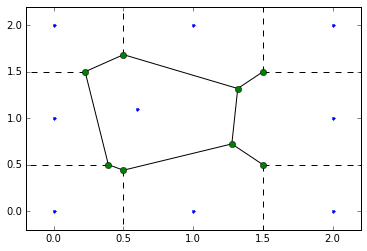

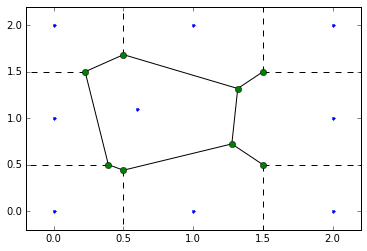

In [3]:
voronoi_plot_2d(vor)

In [4]:
vor.vertices

array([[ 0.39166667,  0.5       ],
       [ 0.225     ,  1.5       ],
       [ 0.5       ,  0.44090909],
       [ 1.5       ,  0.5       ],
       [ 1.27666667,  0.72333333],
       [ 0.5       ,  1.68333333],
       [ 1.5       ,  1.5       ],
       [ 1.31923077,  1.31923077]])

In [5]:
vor.regions

[[],
 [1, -1, 0],
 [2, 0, -1],
 [3, -1],
 [4, 2, -1, 3],
 [7, 5, -1, 6],
 [6, -1],
 [5, 1, -1],
 [7, 4, 2, 0, 1, 5],
 [7, 4, 3, -1, 6]]

The "central" point

In [6]:
vor.points[4]

array([ 0.6,  1.1])

The corresponding region

In [7]:
vor.point_region[4]

8

The edges of the region (if -1 is there, it means a vertex outside the Voronoi diagram, see http://scipy.github.io/devdocs/generated/scipy.spatial.Voronoi.html)

In [8]:
vor.regions[vor.point_region[4]]

[7, 4, 2, 0, 1, 5]

The corresponding point coords

In [9]:
central_voronoi = np.array([vor.vertices[idx] for idx in vor.regions[vor.point_region[4]]])
print central_voronoi

[[ 1.31923077  1.31923077]
 [ 1.27666667  0.72333333]
 [ 0.5         0.44090909]
 [ 0.39166667  0.5       ]
 [ 0.225       1.5       ]
 [ 0.5         1.68333333]]


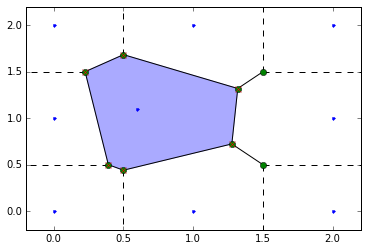

In [10]:
voronoi_plot_2d(vor)
plot(central_voronoi[:,0], central_voronoi[:,1], 'x')
fill(*central_voronoi.T, color='#AAAAFF')

# Now, in 3D!

In [85]:
b1 = np.array([1,1,0]); b2 = np.array([1,0,1]); b3 = np.array([0,1,1])
#b1 = np.array([1,0,0]); b2 = np.array([0,1,0]); b3 = np.array([0,0,1])
supercell_size = 2
points3d = []
central_idx = None
for i in range(-supercell_size, supercell_size+1):
    for j in range(-supercell_size, supercell_size+1):
        for k in range(-supercell_size, supercell_size+1):
            if i==0 and j==0 and k==0:
                central_idx = len(points3d)
            points3d.append(i*b1 + j*b2 + k*b3)

In [86]:
vor3d = Voronoi(np.array(points3d))

In [87]:
central_voronoi_3d = np.array([vor3d.vertices[idx] for idx in vor3d.regions[vor3d.point_region[central_idx]]])
central_voronoi_3d

array([[-0.5,  0.5, -0.5],
       [ 0.5, -0.5, -0.5],
       [ 0.5,  0.5, -0.5],
       [ 0. ,  0. , -1. ],
       [ 1. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5],
       [ 0. ,  1. ,  0. ],
       [-0.5, -0.5, -0.5],
       [-0.5,  0.5,  0.5],
       [-1. ,  0. ,  0. ],
       [ 0.5, -0.5,  0.5],
       [-0.5, -0.5,  0.5],
       [ 0. ,  0. ,  1. ],
       [ 0. , -1. ,  0. ]])

In [88]:
#%matplotlib wx
#from mpl_toolkits.mplot3d import Axes3D
#fig = figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(*central_voronoi_3d.T)
#ax.plot(*central_voronoi_3d.T)

In [90]:
from scipy.spatial import ConvexHull
hull = ConvexHull(central_voronoi_3d)

In [91]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [92]:
## Only triangular faces yet
#fig = figure()
#ax = fig.add_subplot(111, projection='3d')
#for triangles in hull.simplices:
#    ax.add_collection3d(Poly3DCollection([[
#            central_voronoi_3d[triangles[0],:],
#            central_voronoi_3d[triangles[1],:],
#            central_voronoi_3d[triangles[2],:]]],linewidths=1, alpha=0.2))

In [93]:
hull.area, hull.volume

(8.485281374238571, 2.0000000000000004)

In [94]:
central_voronoi_3d

array([[-0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5],
       [ 0. ,  0. ,  0. ],
       [ 1. ,  0. ,  1. ],
       [ 0.5,  0.5,  1.5],
       [ 0. ,  1. ,  1. ],
       [-0.5, -0.5,  0.5],
       [-0.5,  0.5,  1.5],
       [-1. ,  0. ,  1. ],
       [ 0.5, -0.5,  1.5],
       [-0.5, -0.5,  1.5],
       [ 0. ,  0. ,  2. ],
       [ 0. , -1. ,  1. ]])

In [95]:
hull.simplices

array([[ 5,  8, 12],
       [ 5,  8,  6],
       [ 0,  8,  6],
       [ 0,  8,  9],
       [ 2,  5,  6],
       [ 2,  5,  4],
       [ 2,  0,  6],
       [ 2,  0,  3],
       [10,  5,  4],
       [10,  5, 12],
       [11,  8,  9],
       [11,  8, 12],
       [11, 10, 12],
       [11, 10, 13],
       [ 7,  0,  3],
       [ 7,  0,  9],
       [ 7, 11,  9],
       [ 7, 11, 13],
       [ 1,  2,  3],
       [ 1,  2,  4],
       [ 1, 10,  4],
       [ 1, 10, 13],
       [ 1,  7,  3],
       [ 1,  7, 13]], dtype=int32)

In [96]:
#fig = figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_trisurf(central_voronoi_3d[:,0], central_voronoi_3d[:,1], central_voronoi_3d[:,2],
#                triangles=hull.simplices)

In [97]:
from collections import defaultdict
edges = defaultdict(set)
for simplex_idx, simplex in enumerate(hull.simplices):
    edges[tuple(sorted([simplex[0],simplex[1]]))].add(simplex_idx)
    edges[tuple(sorted([simplex[1],simplex[2]]))].add(simplex_idx)
    edges[tuple(sorted([simplex[2],simplex[0]]))].add(simplex_idx)
# convert to dictionary of lists (from defaultdict of sets)
edges = {k: list(v) for k, v in edges.iteritems()}
edges

{(0, 2): [6, 7],
 (0, 3): [14, 7],
 (0, 6): [2, 6],
 (0, 7): [14, 15],
 (0, 8): [2, 3],
 (0, 9): [3, 15],
 (1, 2): [18, 19],
 (1, 3): [18, 22],
 (1, 4): [19, 20],
 (1, 7): [22, 23],
 (1, 10): [20, 21],
 (1, 13): [21, 23],
 (2, 3): [18, 7],
 (2, 4): [19, 5],
 (2, 5): [4, 5],
 (2, 6): [4, 6],
 (3, 7): [22, 14],
 (4, 5): [8, 5],
 (4, 10): [8, 20],
 (5, 6): [1, 4],
 (5, 8): [0, 1],
 (5, 10): [8, 9],
 (5, 12): [0, 9],
 (6, 8): [1, 2],
 (7, 9): [16, 15],
 (7, 11): [16, 17],
 (7, 13): [17, 23],
 (8, 9): [10, 3],
 (8, 11): [10, 11],
 (8, 12): [0, 11],
 (9, 11): [16, 10],
 (10, 11): [12, 13],
 (10, 12): [9, 12],
 (10, 13): [13, 21],
 (11, 12): [11, 12],
 (11, 13): [17, 13]}

In [98]:
def are_coplanar(tr1, tr2, coords):
    normal1 = get_normal(tr1, coords)
    normal2 = get_normal(tr2, coords)
    np.dot()

def get_missing_point(tr, p1, p2):
    """
    Tr is a list of 3 indices, p1 and p2 must be in the list, the third index is returned
    """
    missing = None
    for idx, vertex in enumerate(tr):
        if vertex == p1 or vertex == p2:
            pass
        else:
            if missing is not None:
                raise ValueError("Two missing points found...")
            missing = vertex

    if missing is None:
        raise ValueError("No missing points!")
        
    return missing
                
def are_coplanar(v1,v2,v3):
    return float(abs(np.dot(np.cross(v1,v2),v3))) < 1.e-6
    
faces = [] # List of faces (elements are list of vertex ids)
merged_simplices = [] # List of found simplices that have been merged
for (p1, p2), tr in edges.iteritems():
    if len(tr) != 2:
        # ??
        print "Warning!", p1, p2, tr
        continue
    else:
        # Check if two triangles are coplanar
        otherpoint0 = get_missing_point(hull.simplices[tr[0]], p1, p2)
        otherpoint1 = get_missing_point(hull.simplices[tr[1]], p1, p2)
        # The actual vectors
        otherpoint0_p = hull.points[otherpoint0]
        otherpoint1_p = hull.points[otherpoint1]
        p1_p = hull.points[p1]
        p2_p = hull.points[p2]
        
        if are_coplanar(p2_p - p1_p, otherpoint0_p - p1_p, otherpoint1_p - p1_p):
            faces.append(np.array([otherpoint0, p1, otherpoint1, p2]))
            merged_simplices += [tr[0], tr[1]]

merged_simplices = set(merged_simplices)
for face in range(len(hull.simplices)): 
    if face not in merged_simplices:
        faces.append(face)
faces

[array([12, 10, 13, 11], dtype=int32),
 array([3, 0, 9, 7], dtype=int32),
 array([ 9,  7, 13, 11], dtype=int32),
 array([6, 2, 4, 5], dtype=int32),
 array([12,  5,  6,  8], dtype=int32),
 array([3, 1, 4, 2], dtype=int32),
 array([ 4,  1, 13, 10], dtype=int32),
 array([ 9,  8, 12, 11], dtype=int32),
 array([6, 0, 9, 8], dtype=int32),
 array([ 4,  5, 12, 10], dtype=int32),
 array([6, 0, 3, 2], dtype=int32),
 array([ 3,  1, 13,  7], dtype=int32)]

In [99]:
print "Triangles:",len([_ for _ in faces if len(_) == 3])
print "Quadrilaterals:", len([_ for _ in faces if len(_) == 4])

Triangles: 0
Quadrilaterals: 12


In [102]:
faces_coords = [[hull.points[pt] for pt in face] for face in faces]
faces_coords

[[array([ 0.,  0.,  2.]),
  array([ 0.5, -0.5,  1.5]),
  array([ 0., -1.,  1.]),
  array([-0.5, -0.5,  1.5])],
 [array([ 0.,  0.,  0.]),
  array([-0.5,  0.5,  0.5]),
  array([-1.,  0.,  1.]),
  array([-0.5, -0.5,  0.5])],
 [array([-1.,  0.,  1.]),
  array([-0.5, -0.5,  0.5]),
  array([ 0., -1.,  1.]),
  array([-0.5, -0.5,  1.5])],
 [array([ 0.,  1.,  1.]),
  array([ 0.5,  0.5,  0.5]),
  array([ 1.,  0.,  1.]),
  array([ 0.5,  0.5,  1.5])],
 [array([ 0.,  0.,  2.]),
  array([ 0.5,  0.5,  1.5]),
  array([ 0.,  1.,  1.]),
  array([-0.5,  0.5,  1.5])],
 [array([ 0.,  0.,  0.]),
  array([ 0.5, -0.5,  0.5]),
  array([ 1.,  0.,  1.]),
  array([ 0.5,  0.5,  0.5])],
 [array([ 1.,  0.,  1.]),
  array([ 0.5, -0.5,  0.5]),
  array([ 0., -1.,  1.]),
  array([ 0.5, -0.5,  1.5])],
 [array([-1.,  0.,  1.]),
  array([-0.5,  0.5,  1.5]),
  array([ 0.,  0.,  2.]),
  array([-0.5, -0.5,  1.5])],
 [array([ 0.,  1.,  1.]),
  array([-0.5,  0.5,  0.5]),
  array([-1.,  0.,  1.]),
  array([-0.5,  0.5,  1.5])],
 

In [135]:
%matplotlib wx
fig = figure()
ax = fig.add_subplot(111, projection='3d')

ax.add_collection3d(Poly3DCollection(faces_coords,linewidth=1, alpha=0.6, edgecolor="k", facecolor="#ccccff"))
    
axes_length = 2
# Add axes
ax.plot3D((0,axes_length),(0,0),(0,0), color='r', lw=1)
ax.plot3D((0,0),(0,axes_length),(0,0), color='r', lw=1)
ax.plot3D((0,0),(0,0),(0,axes_length), color='r', lw=1)

## Reset limits
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.axis('off')
ax.view_init(elev=0, azim=60)

# 2D convex hull

In [24]:
points2d = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1]]; hull2d = ConvexHull(points2d)#, hull_options="Qt Qbb Qc")

In [25]:
hull2d.simplices

array([[4, 0],
       [1, 0],
       [5, 4],
       [5, 1]], dtype=int32)

In [35]:
hull.points

array([[ 0.5, -0.5,  0. ],
       [-0.5, -0.5,  0. ],
       [ 0.5, -0.5,  1. ],
       [-0.5, -0.5,  1. ],
       [-0.5,  0.5,  1. ],
       [-0.5,  0.5,  0. ],
       [ 0.5,  0.5,  1. ],
       [ 0.5,  0.5,  0. ]])